1. Load Dependencies

In [1]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorboard-2.10.0-py3-none-any.whl (5.9 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.0
    Uninstalling tensorboard-2.9.0:
      Successfully uninstalled tensorboard-2.9.0


In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

2. Remove Bad Image Files

In [5]:
import cv2
import imghdr

In [12]:
data_dir = 'D:\Data Store\Deep CNN Image Classifier Dataset\data' 

In [13]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [14]:
os.listdir(data_dir)

['happy', 'sad']

In [15]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

3. Load Data

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory('D:\Data Store\Deep CNN Image Classifier Dataset\data')

Found 165 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()

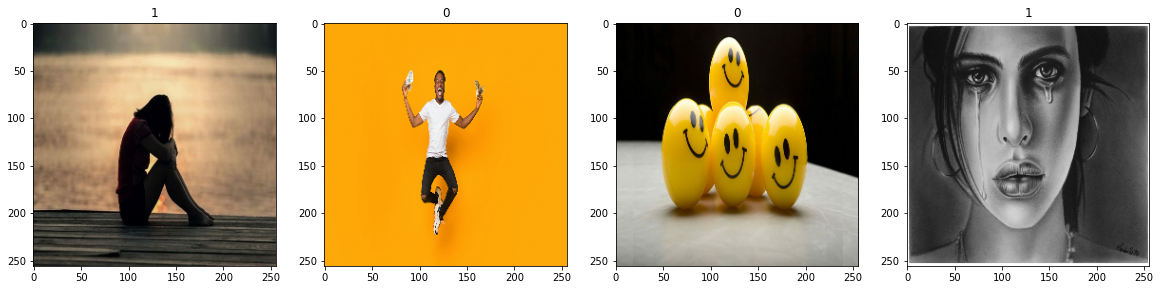

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4. Scale Data

In [21]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.06666667, 0.07058824, 0.14117648],
          [0.06666

5. Split Data

In [40]:
len(data)

6

In [42]:
train_size = int(len(data)*.7)-1
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [43]:
train_size+val_size+test_size

6

In [44]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

6. Build Deep Learning Model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [46]:
model = Sequential()

In [47]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [48]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

7. Train

In [50]:
logdir='D:\Data Store\Deep CNN Image Classifier Dataset\logs'

In [51]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [52]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 3s 815ms/step - loss: 0.9728 - accuracy: 0.4792 - val_loss: 0.8024 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 3s 758ms/step - loss: 0.7568 - accuracy: 0.5833 - val_loss: 0.6162 - val_accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 3s 758ms/step - loss: 0.6789 - accuracy: 0.5417 - val_loss: 0.5319 - val_accuracy: 0.6406
Epoch 4/20
3/3 [==============================] - 3s 773ms/step - loss: 0.5735 - accuracy: 0.6458 - val_loss: 0.5725 - val_accuracy: 0.7656
Epoch 5/20
3/3 [==============================] - 3s 746ms/step - loss: 0.5818 - accuracy: 0.8229 - val_loss: 0.5291 - val_accuracy: 0.8438
Epoch 6/20
3/3 [==============================] - 3s 760ms/step - loss: 0.5040 - accuracy: 0.7812 - val_loss: 0.4406 - val_accuracy: 0.7656
Epoch 7/20
3/3 [==============================] - 3s 742ms/step - loss: 0.4965 - accuracy: 0.7292 - val_loss: 0.4753 - val_accuracy: 0.8125
Epoch 8/20
3/3 [====

8. Plot Performance

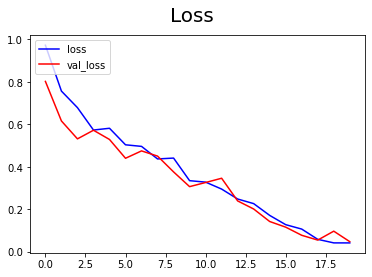

In [53]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

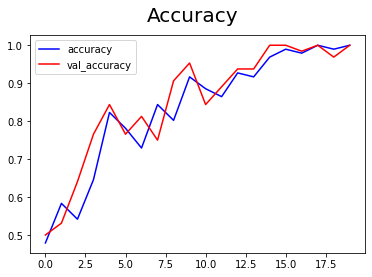

In [54]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. Evaluate

In [55]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [56]:
prec = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [57]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    prec.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 89ms/step


In [59]:
print(f'Precision: {prec.result()}, Recall: {rec.result()}, Accuracy: {acc.result()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


10. Test

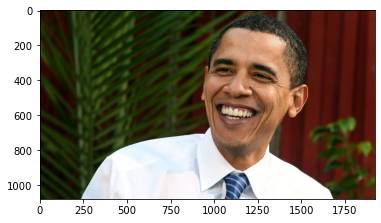

In [95]:
import cv2
#may need to use forward slashes '/'
img = cv2.imread("D:/Data Store/Deep CNN Image Classifier Dataset/newhappyimage.jpg")
#print(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

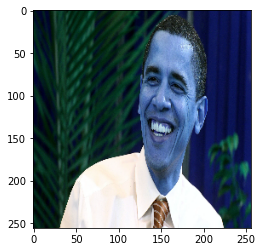

In [96]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [97]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [98]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 20ms/step


In [99]:
yhat

array([[0.9830126]], dtype=float32)

In [100]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


11. Save Model

In [101]:
from tensorflow.keras.models import load_model

In [104]:
model.save(os.path.join('D:\Data Store\Deep CNN Image Classifier Dataset\models','imageclassifier.h5'))

In [106]:
new_model = load_model('D:\Data Store\Deep CNN Image Classifier Dataset\models\imageclassifier.h5')

In [108]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 20ms/step


In [109]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
